# Model 3

same purpose as model 2.

In [1]:
    
    import math
import matplotlib.pyplot as plt
import numpy as np
import copy

In [29]:
class Model3:
    def __init__(self, a2, a3, s2, s3, g2, h2, g3, h3):
        self.a2 = a2
        self.a3 = a3
        self.s2 = s2
        self.s3 = s3
        self.g2 = g2
        self.g3 = g3
        self.h2 = h2
        self.h3 = h3
        
    def w2(self, t, p, V):
        g = self.h2 if (t % p) == 0 else self.g2     
        return g*math.exp(-self.s2*(V[0] + V[1] + V[2]))
    
    def w3(self, t, p, V):
        g = self.h3 if (t % p) == 0 else self.g3     
        return g*math.exp(-self.s3*(V[0] + V[1] + V[2]))
    
    def H(self, t, p, V):
        return [self.a2*V[1] + self.a3*V[2], self.w2(t, p, V)*V[0], self.w3(t, p, V)*V[1]]
    
    def simulate(self, p, V_init, tmax):
        Vt = V_init
        V = [Vt]
        for t in range(1, tmax):
            Vt = self.H(t, p, Vt)
            V.append(Vt)
            
        return V
     
    def plot(self, V, p, tmax):
        V = np.array(V).sum(axis=1)
        
        f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(24,3))
        a0.plot(V, '.')
        if p != 1:
            for t in range(0, tmax, p):
                a0.axvline(t)
        a0.set_ylim([0.97, 1.1])
        a0.set_yticks(np.linspace(0.98, 1.1, 7))
        a0.set_title(f"p == {p}")
        
        # limit cycle
        start = (tmax // p) * (p-1)
        a1.plot(V[start: start+p], 'o')
        a1.set_ylim([0.97, 1.1])
        a1.set_yticks(np.linspace(0.98, 1.1, 7))
        a1.set_title(f"limit cycle for p == {p}")
        plt.show()

In [30]:
DEFAULT_NO_CICADA_PARAMS = {
    'a2': .1,
    'a3': 3,
    's2': 0.142,
    's3': 0.142,
    'g2': 0.6,
    'h2': 0.6,
    'g3': 0.7,
    'h3': 0.7,
    'V_init': [0.55, 0.25, 0.20]
}

DEFAULT_CICADA_PARAMS = {
    'a2': .1,
    'a3': 3,
    's2': 0.142,
    's3': 0.142,
    'g2': 0.6,
    'h2': 0.64,
    'g3': 0.7,
    'h3': 0.74,
    'V_init': [0.55, 0.25, 0.20]
}

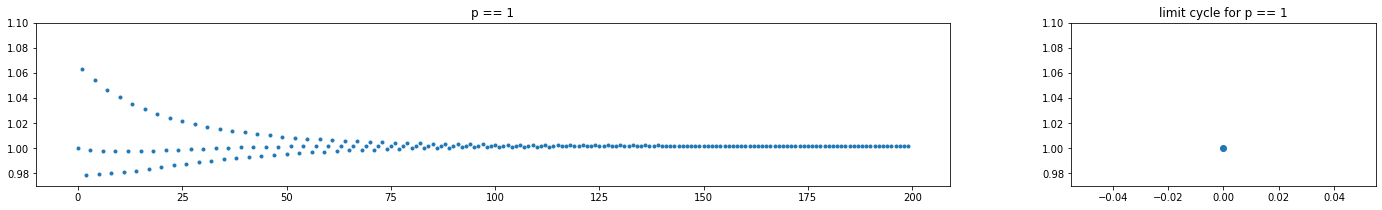

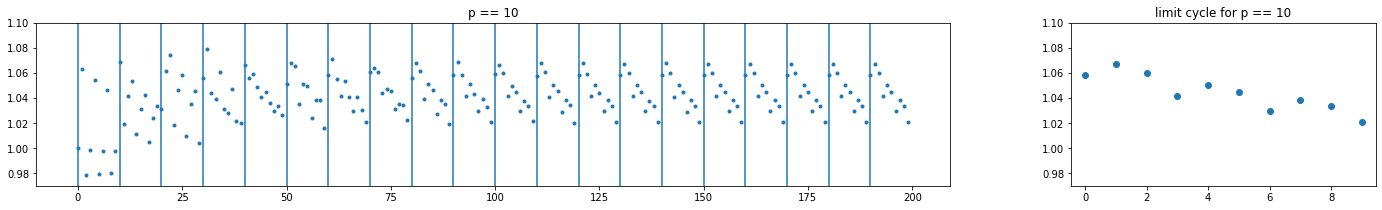

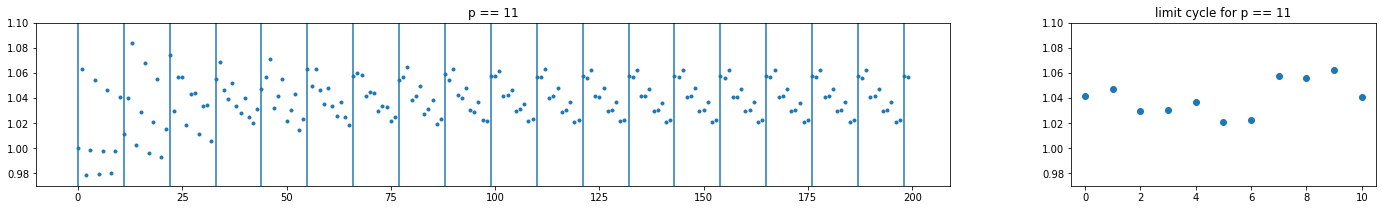

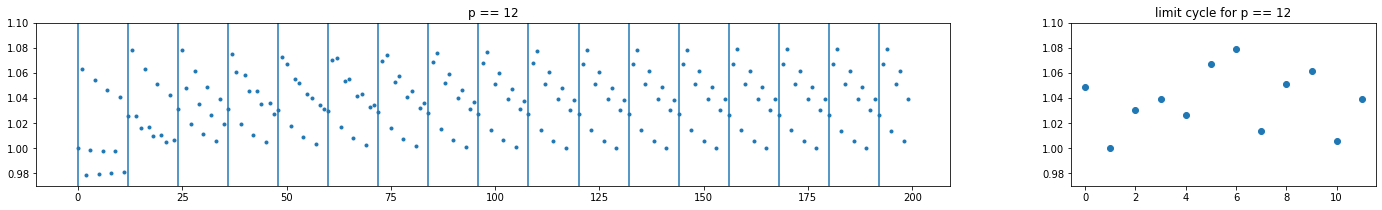

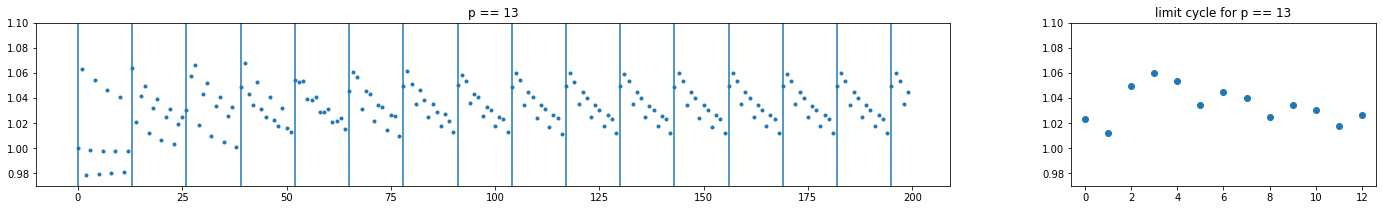

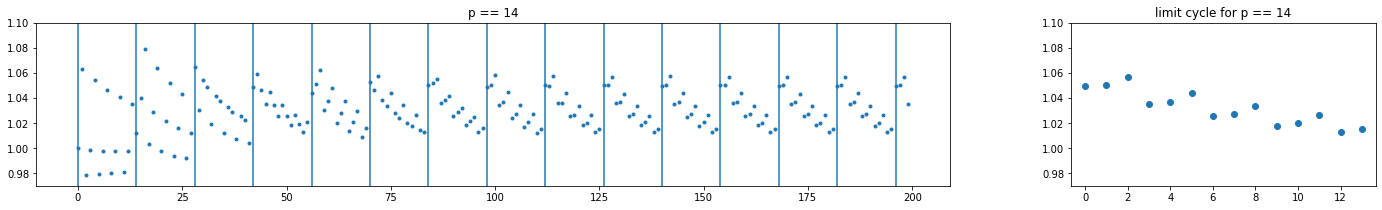

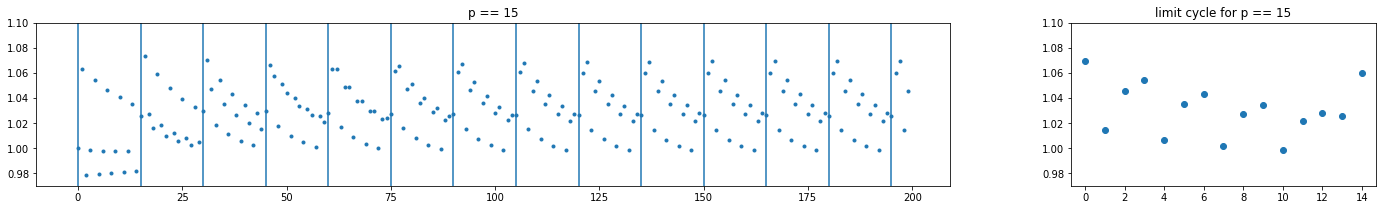

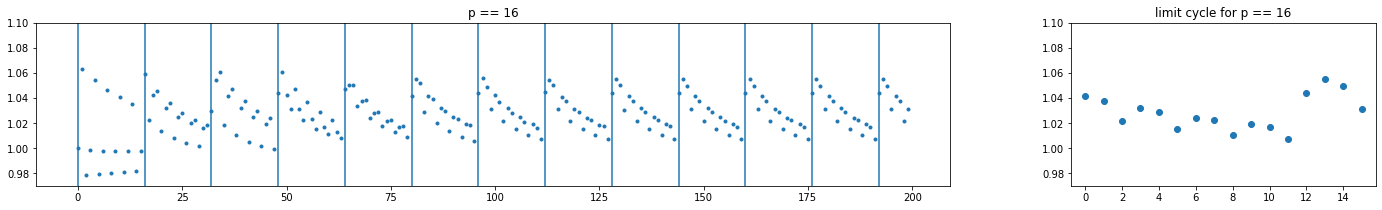

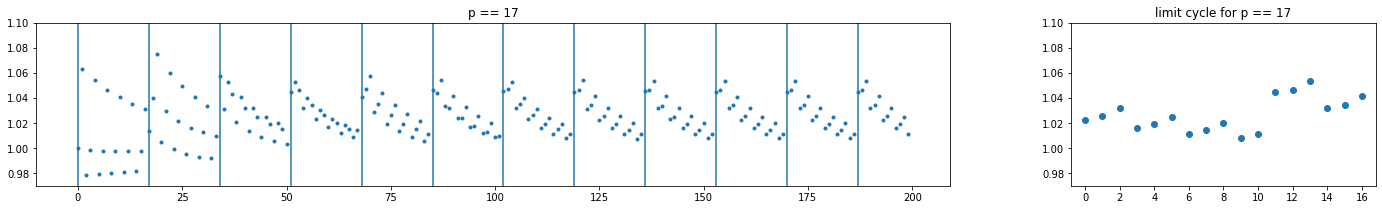

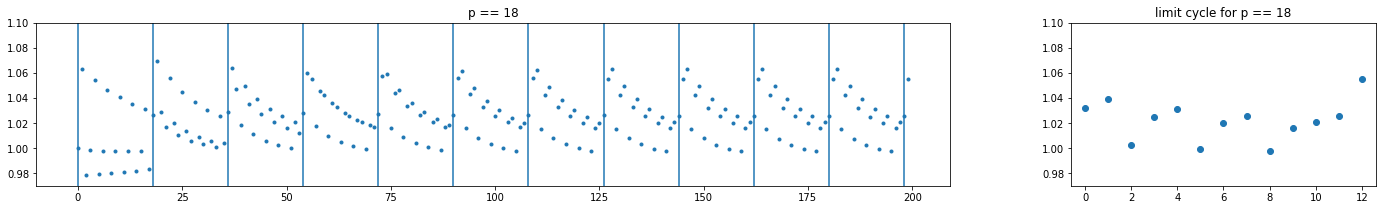

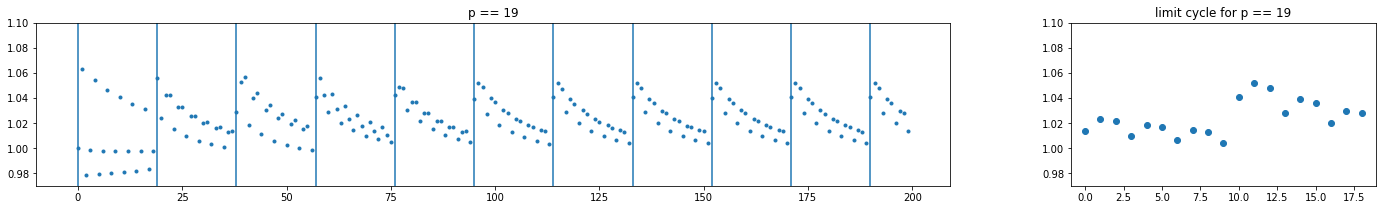

In [31]:
a2, a3, s2, s3, g2, h2, g3, h3, V_init = DEFAULT_NO_CICADA_PARAMS.values()
M = Model3(a2, a3, s2, s3, g2, h2, g3, h3)

p = 1; tmax = 200
V = M.simulate(p, V_init, tmax)
M.plot(V, p, tmax)

a2, a3, s2, s3, g2, h2, g3, h3, V_init  = DEFAULT_CICADA_PARAMS.values()
M = Model3(a2, a3, s2, s3, g2, h2, g3, h3)

for p in [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]:
    V = M.simulate(p, V_init, tmax)
    M.plot(V, p, tmax)